🧠 Assignment 1 – Vision par Ordinateur

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def show(img, title="", cmap=None):
    plt.figure(figsize=(5,5))
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")


1️⃣ Niveaux de gris

Markdown (cellule texte)

Conversion d’une image de caméra de surveillance en niveaux de gris.
Comparaison entre l’image originale et l’image en niveaux de gris.
Identification du pixel le plus lumineux afin de repérer une source de lumière.
L’image en niveaux de gris est plus adaptée à la détection de mouvement car elle réduit la quantité d’information à traiter.

Pixel le plus lumineux : 254
Position : (array([205, 327], dtype=int64), array([ 98, 183], dtype=int64))


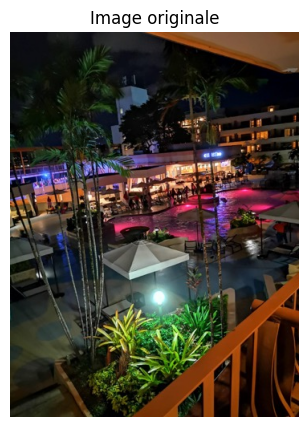

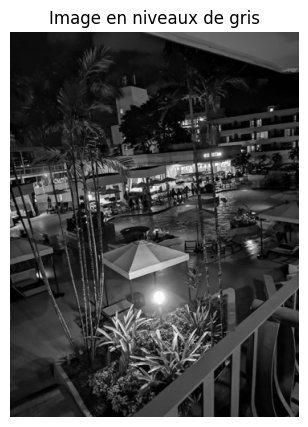

In [5]:
img = cv2.imread("images/hilton.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

show(img, "Image originale")
show(gray, "Image en niveaux de gris", cmap="gray")

max_pixel = np.max(gray)
pos = np.where(gray == max_pixel)

print("Pixel le plus lumineux :", max_pixel)
print("Position :", pos)


2️⃣ Espaces de couleurs – Feu tricolore

Markdown (cellule texte)

Conversion de l’image du feu tricolore dans l’espace HSV.
Création de masques pour les couleurs rouge, orange et verte.
La lumière allumée est détectée automatiquement en comparant les surfaces des masques.

In [6]:
img = cv2.imread("images/fireworks.jpeg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

red1 = cv2.inRange(hsv, (0,120,70), (10,255,255))
red2 = cv2.inRange(hsv, (170,120,70), (180,255,255))
red = red1 + red2

orange = cv2.inRange(hsv, (11,100,100), (25,255,255))
green = cv2.inRange(hsv, (35,100,100), (85,255,255))

counts = {
    "Rouge": np.sum(red),
    "Orange": np.sum(orange),
    "Vert": np.sum(green)
}

print("Lumière détectée :", max(counts, key=counts.get))


Lumière détectée : Rouge


3️⃣ Dessin sur des images (Football)

Markdown (cellule texte)

Annotation d’une image de match de football.
Un rectangle est utilisé pour localiser le ballon.
Une flèche indique la direction du tir et un texte affiche la vitesse du tir.

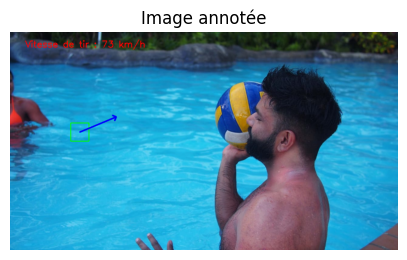

In [7]:
img = cv2.imread("images/Volleyball.jpeg")

cv2.rectangle(img, (200,300), (260,360), (0,255,0), 2)
cv2.arrowedLine(img, (230,330), (350,280), (255,0,0), 3)
cv2.putText(img, "Vitesse de tir : 73 km/h",
            (50,50), cv2.FONT_HERSHEY_SIMPLEX,
            1, (0,0,255), 2)

show(img, "Image annotée")


4️⃣ Transformations – Rotation

Markdown (cellule texte)

Estimation de l’angle d’inclinaison d’une image prise de travers.
Application d’une rotation inverse pour redresser la scène.
Comparaison visuelle entre l’image avant et après redressement.

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
Angle estimé : 45.000000341622666


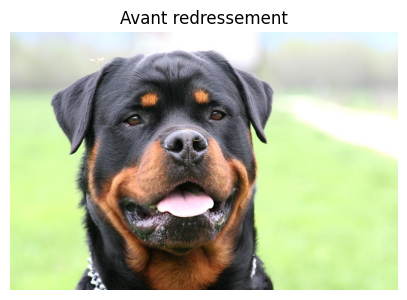

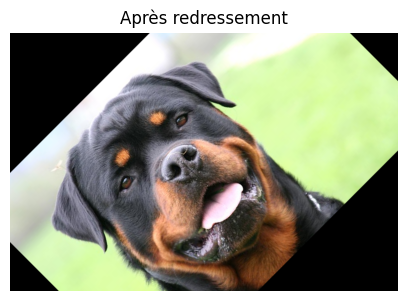

In [8]:
img = cv2.imread("images/rot.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi/180, 150)

angle = (lines[0][0][1] - np.pi/2) * 180/np.pi
print("Angle estimé :", angle)

h, w = img.shape[:2]
M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1)
rotated = cv2.warpAffine(img, M, (w, h))

show(img, "Avant redressement")
show(rotated, "Après redressement")


5️⃣ Redimensionnement, Interpolation et Recadrage

Markdown (cellule texte)

Préparation d’une image produit pour un site e-commerce.
Redimensionnement en 512×512 pixels et création de miniatures 128×128.
Comparaison de différentes méthodes d’interpolation.

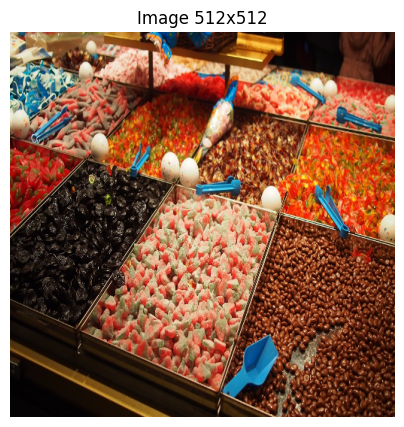

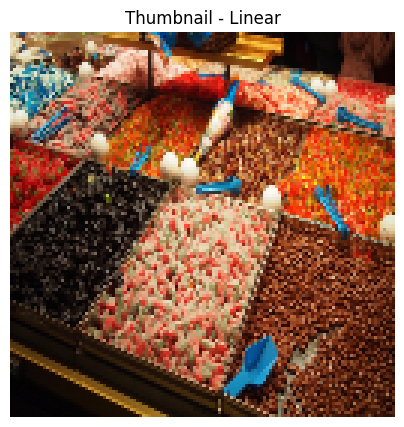

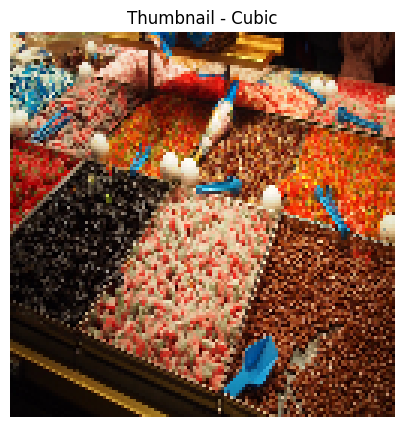

In [9]:
img = cv2.imread("images/candy.jpg")

img512 = cv2.resize(img, (512,512))
thumb_linear = cv2.resize(img512, (128,128), interpolation=cv2.INTER_LINEAR)
thumb_cubic = cv2.resize(img512, (128,128), interpolation=cv2.INTER_CUBIC)

show(img512, "Image 512x512")
show(thumb_linear, "Thumbnail - Linear")
show(thumb_cubic, "Thumbnail - Cubic")


6️⃣ Seuillage et Histogrammes

Markdown (cellule texte)

Analyse de l’histogramme d’une image satellite à faible contraste.
Amélioration du contraste par égalisation d’histogramme.
Séparation automatique des régions claires et sombres à l’aide du seuillage d’Otsu.

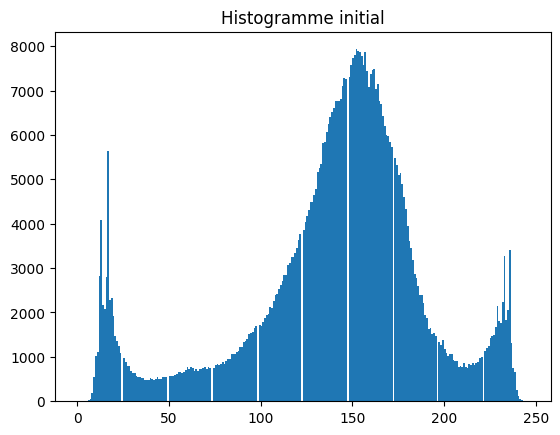

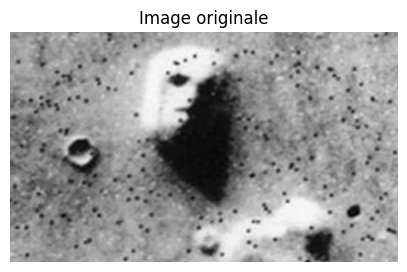

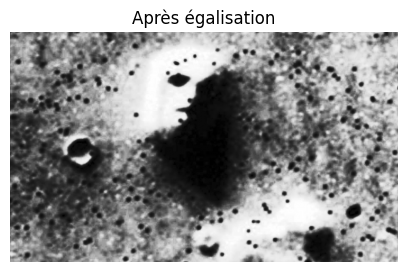

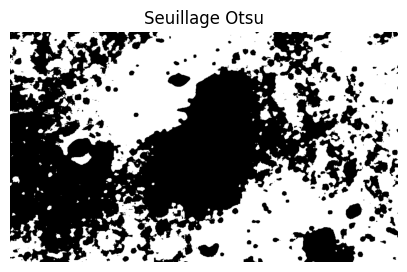

In [10]:
img = cv2.imread("images/marsface.jpg", 0)

plt.hist(img.ravel(), 256)
plt.title("Histogramme initial")
plt.show()

eq = cv2.equalizeHist(img)

_, otsu = cv2.threshold(eq, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show(img, "Image originale", cmap="gray")
show(eq, "Après égalisation", cmap="gray")
show(otsu, "Seuillage Otsu", cmap="gray")


7️⃣ Rehaussement d’images

Markdown (cellule texte)

Amélioration d’une image prise de nuit.
Application d’une correction gamma douce pour éclaircir les zones sombres.
Augmentation légère du contraste pour améliorer la visibilité.

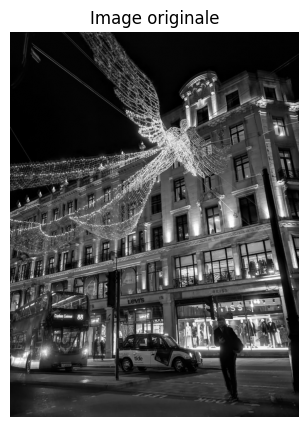

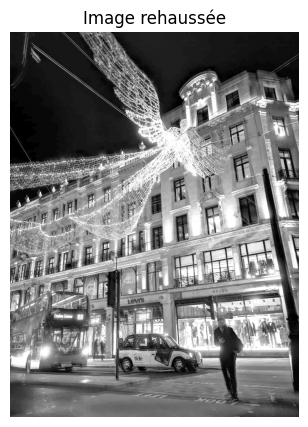

In [11]:
img = cv2.imread("images/londonxmas.jpeg", 0)

gamma = 1.6
gamma_corr = np.array(255*(img/255)**(1/gamma), dtype='uint8')
contrast = cv2.convertScaleAbs(gamma_corr, alpha=1.2, beta=10)

show(img, "Image originale", cmap="gray")
show(contrast, "Image rehaussée", cmap="gray")


8️⃣ Convolutions, Flou et Netteté

Markdown (cellule texte)

Réduction du bruit par filtrage gaussien.
Application d’un filtre de netteté pour restaurer les détails.
Illustration des effets du bruit sur une image numérique.

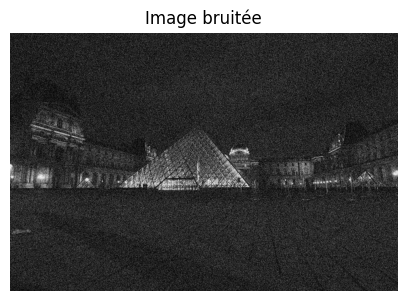

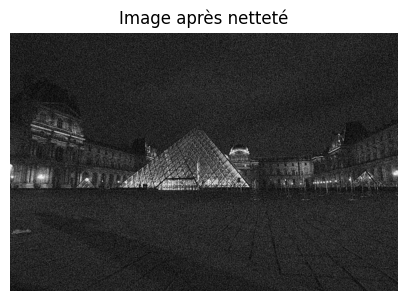

In [12]:
img = cv2.imread("images/lourve_noise.jpg", 0)

blur = cv2.GaussianBlur(img, (5,5), 0)

kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharp = cv2.filter2D(blur, -1, kernel)

noise = np.random.normal(0, 25, img.shape)
noisy = np.clip(img + noise, 0, 255).astype(np.uint8)

show(noisy, "Image bruitée", cmap="gray")
show(sharp, "Image après netteté", cmap="gray")
